# TASK1: Exploratory Data Analysis for eCommerce Transactions


**Introduction**
This analysis explores customer behavior, product performance, and sales trends to derive actionable business insights.

## importing the necessary  libraries 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Load the data

In [3]:
customers=pd.read_csv(r"C:\Users\Gunolla Srinivas\Downloads\Customers.csv")
products=pd.read_csv(r"C:\Users\Gunolla Srinivas\Downloads\Products.csv")
transactions=pd.read_csv(r"C:\Users\Gunolla Srinivas\Downloads\Transactions.csv")

## Inspecting the data

In [4]:
print(customers.head())
print("========================================")
print(products.head())
print("========================================")
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
print(customers.describe())
print()
print(customers.info())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [9]:
products.describe()
print()
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [11]:
transactions.describe()
print()
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


## Datapreprocessing

In [12]:
# checking for missing values
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [13]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [14]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [15]:
# Merge datasets
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

merged_data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [16]:
## removing the price_y column, since price_x and price_y indicating the same price values 
merged_data.drop("Price_y",axis=1,inplace=True)


## Feature engineering

In [23]:
# Customer Lifetime Value (CLV)
customer_clv = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_clv.rename(columns={'TotalValue': 'CustomerLifetimeValue'}, inplace=True)
merged_data = merged_data.merge(customer_clv, on='CustomerID', how='left')

# Recency (Days Since Last Purchase)
recency = merged_data.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency['DaysSinceLastPurchase'] = (datetime.now() - recency['TransactionDate']).dt.days
merged_data = merged_data.merge(recency[['CustomerID', 'DaysSinceLastPurchase']], on='CustomerID', how='left')

# Monthly Sales Trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

# Time of Day
merged_data['Hour'] = merged_data['TransactionDate'].dt.hour
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()


## EDA  analysis

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TransactionID          1000 non-null   object        
 1   CustomerID             1000 non-null   object        
 2   ProductID              1000 non-null   object        
 3   TransactionDate        1000 non-null   datetime64[ns]
 4   Quantity               1000 non-null   int64         
 5   TotalValue             1000 non-null   float64       
 6   Price_x                1000 non-null   float64       
 7   CustomerName           1000 non-null   object        
 8   Region                 1000 non-null   object        
 9   SignupDate             1000 non-null   datetime64[ns]
 10  ProductName            1000 non-null   object        
 11  Category               1000 non-null   object        
 12  CustomerLifetimeValue  1000 non-null   float64       
 13  Days

In [14]:
merged_data.describe()

,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,CustomerLifetimeValue,DaysSinceLastPurchase,Hour
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.000000,1000.00000,1000.000000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,4101.272520,87.04400,11.656000
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,82.360000,26.00000,0.000000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,2758.680000,41.00000,6.000000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,3874.420000,77.00000,12.000000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,5377.830000,118.50000,17.250000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,10673.870000,387.00000,23.000000
std,NaN,1.117981,493.144478,140.73639,NaN,1826.684958,54.20382,6.875969


In [17]:
# number of unique items in each column
merged_data.nunique()


TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price_x             100
CustomerName        199
Region                4
SignupDate          178
ProductName          66
Category              4
dtype: int64

In [18]:
# Checking what are the unique regions
merged_data["Region"].unique()

array(['Europe', 'Asia', 'South America', 'North America'], dtype=object)

In [19]:
# Checking what are the different type of categories are available
merged_data["Category"].unique()

array(['Electronics', 'Clothing', 'Books', 'Home Decor'], dtype=object)

**Q1:Count of unique customers signup in each year**

SignupDate
2022    64
2023    56
2024    79
Name: CustomerID, dtype: int64


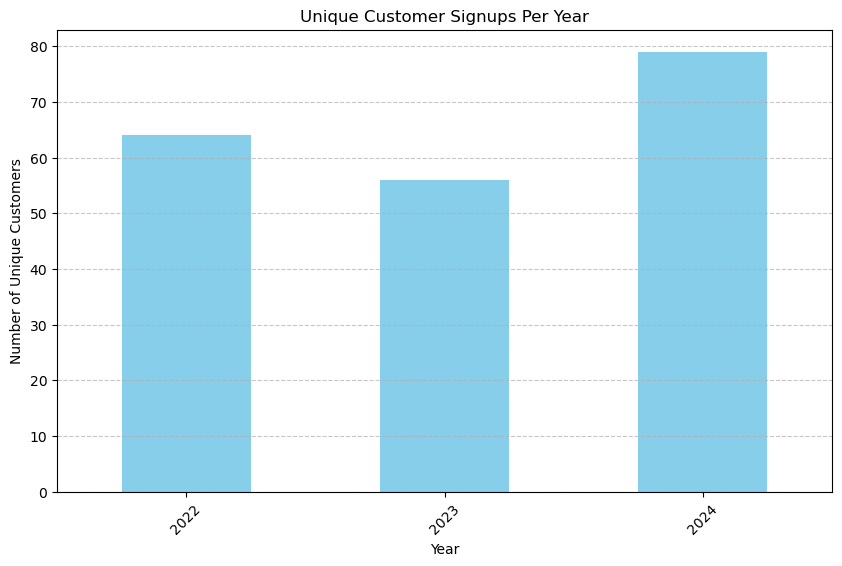

In [20]:

merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'], errors='coerce')

# Group by year and count unique customers
signup_year = merged_data.groupby(merged_data['SignupDate'].dt.year)['CustomerID'].nunique()
print(signup_year)  # Print to verify

# Plot for  the signups per year
plt.figure(figsize=(10, 6))
signup_year.plot(kind='bar', color='skyblue', title='Unique Customer Signups Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Q2:Which customers have the highest lifetime value (CLV)?**

    CustomerID  CustomerLifetimeValue
140      C0141               10673.87
53       C0054                8040.39
64       C0065                7663.70
155      C0156                7634.45
81       C0082                7572.91
186      C0188                7111.32
58       C0059                7073.28
27       C0028                6819.57
98       C0099                6715.72
164      C0165                6708.10


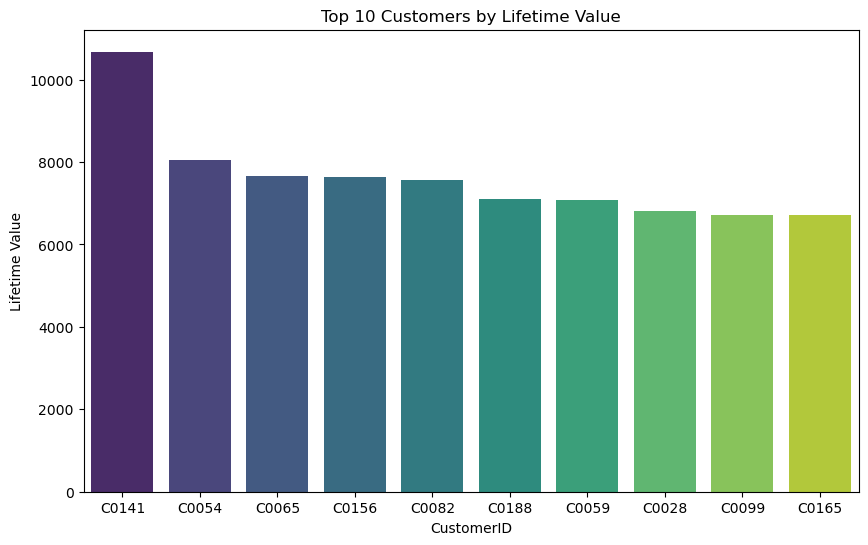

In [24]:

top_customers = customer_clv.sort_values(by='CustomerLifetimeValue', ascending=False).head(10)
print(top_customers)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CustomerID', y='CustomerLifetimeValue', palette='viridis')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('CustomerID')
plt.ylabel('Lifetime Value')
plt.show()


**Q3:What is the customer distribution by region?**

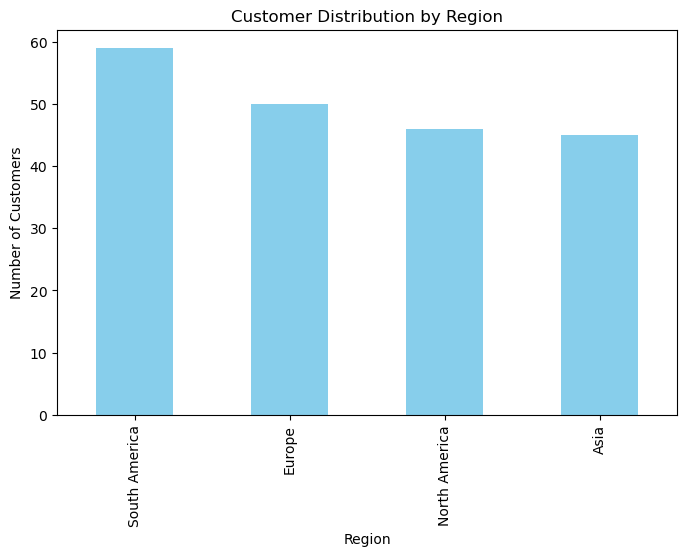

In [20]:

region_distribution = customers['Region'].value_counts()

# Visualization
plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue', title='Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


**Q4: what is the recency of the customers?**

In [21]:
avg_recency = recency['DaysSinceLastPurchase'].mean()
print(f"Average Recency: {avg_recency} days")


Average Recency: 100.48241206030151 days


**Q5: who are the frequent customers?**

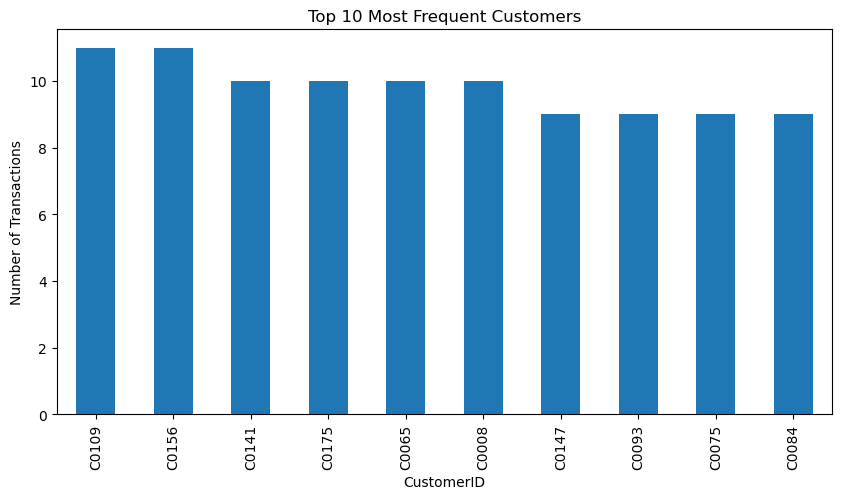

In [27]:
customer_frequency = merged_data['CustomerID'].value_counts().head(10)

# Visualization
customer_frequency.plot(kind='bar', figsize=(10, 5), title='Top 10 Most Frequent Customers')
plt.xlabel('CustomerID')
plt.ylabel('Number of Transactions')
plt.show()


**Q6: Which is the best selling product?**

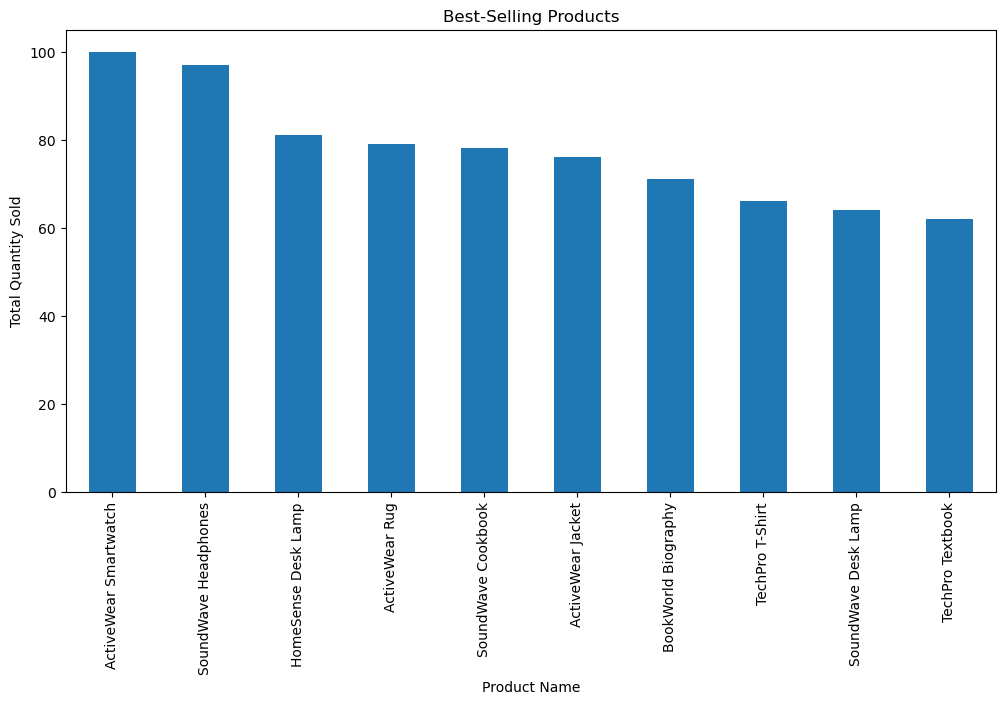

In [23]:
best_selling_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualization
best_selling_products.plot(kind='bar', figsize=(12, 6), title='Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()


**Q7: Which products getting the highest revenue**

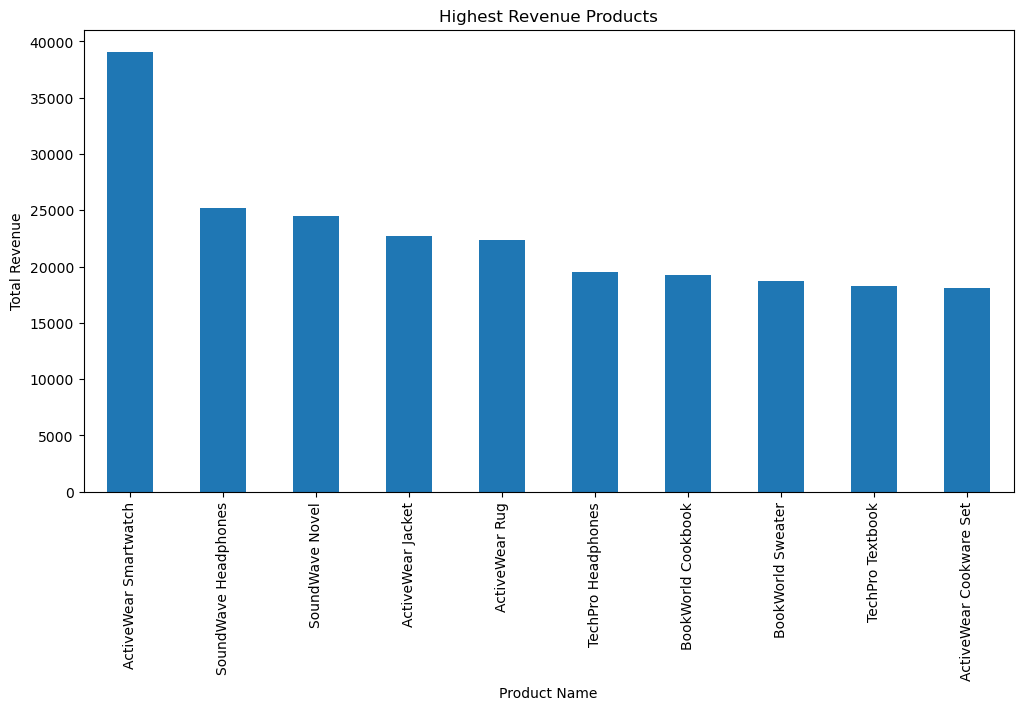

In [28]:
highest_revenue_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Visualization
highest_revenue_products.plot(kind='bar', figsize=(12, 6), title='Highest Revenue Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.show()


**Q8: What is percentage of the revenue by product category?**

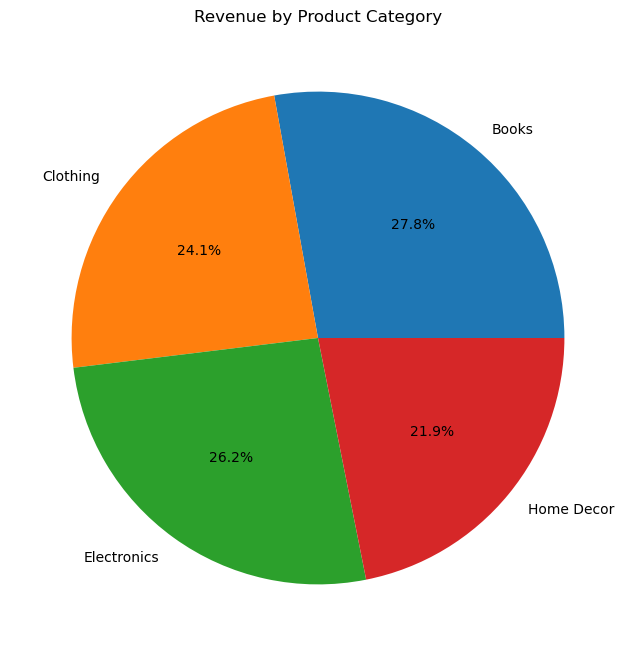

In [25]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()

# Visualization
category_revenue.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title='Revenue by Product Category')
plt.ylabel('')
plt.show()


**Q9: what is avarage cost of the products in each category?**

In [26]:
avg_price_category = products.groupby('Category')['Price'].mean()
print(avg_price_category)


Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


**Q10: What is the revenue from product categories in each region ?**

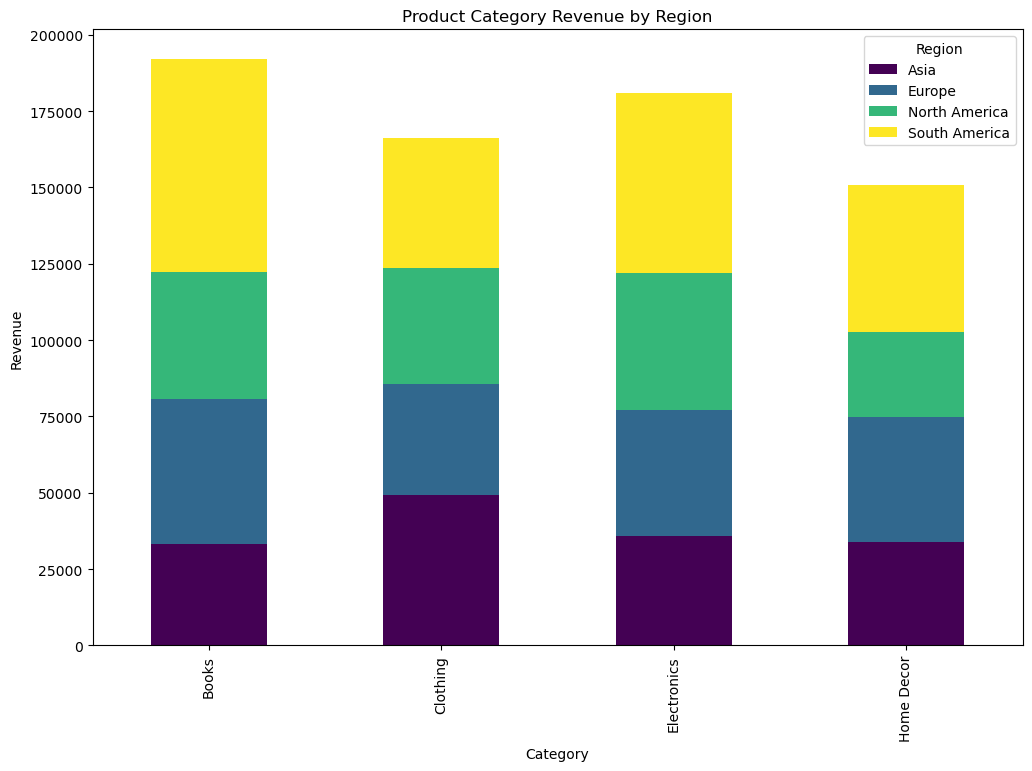

In [33]:
# Revenue by category and region
category_region_revenue = merged_data.groupby(['Category', 'Region'])['TotalValue'].sum().unstack()

# Stacked bar chart
category_region_revenue.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis', title='Product Category Revenue by Region')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.legend(title='Region')
plt.show()


**Q11: What are the monthly revenue trends?**

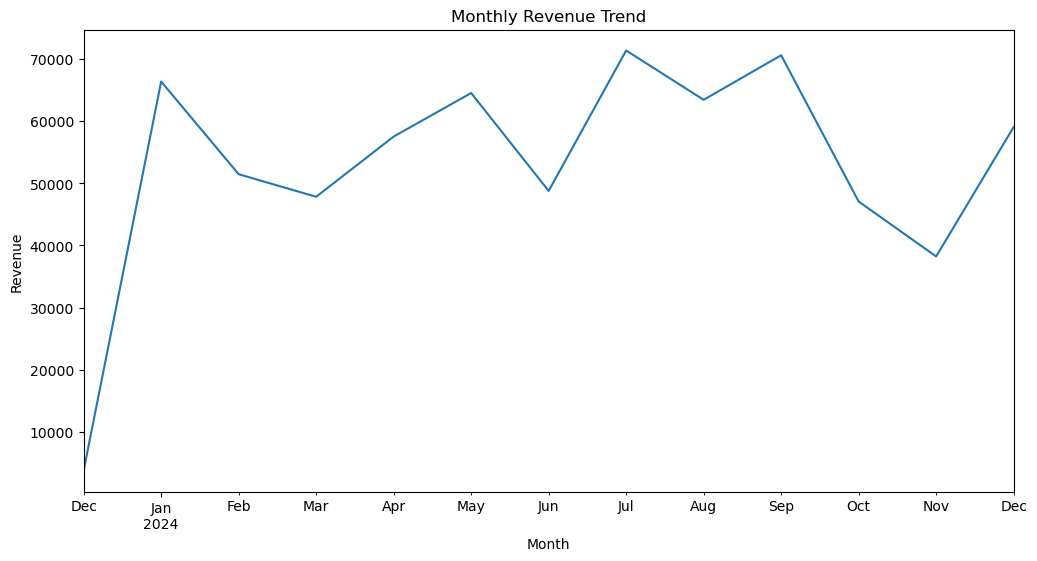

In [27]:
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()

# Visualization
monthly_revenue.plot(kind='line', figsize=(12, 6), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


**Q12: What is the revenue from each region?**

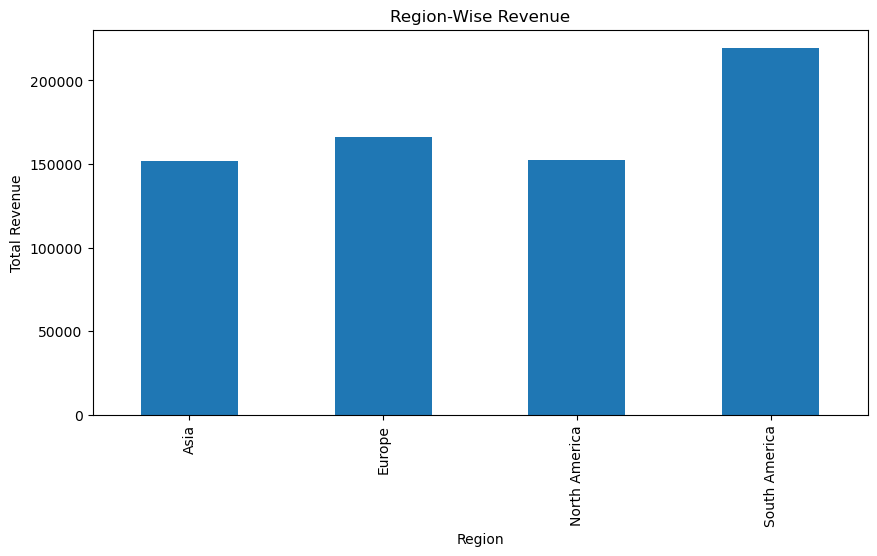

In [28]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()

# Visualization
region_revenue.plot(kind='bar', figsize=(10, 5), title='Region-Wise Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


**Q13: At which time of the day more customers are visiting?**

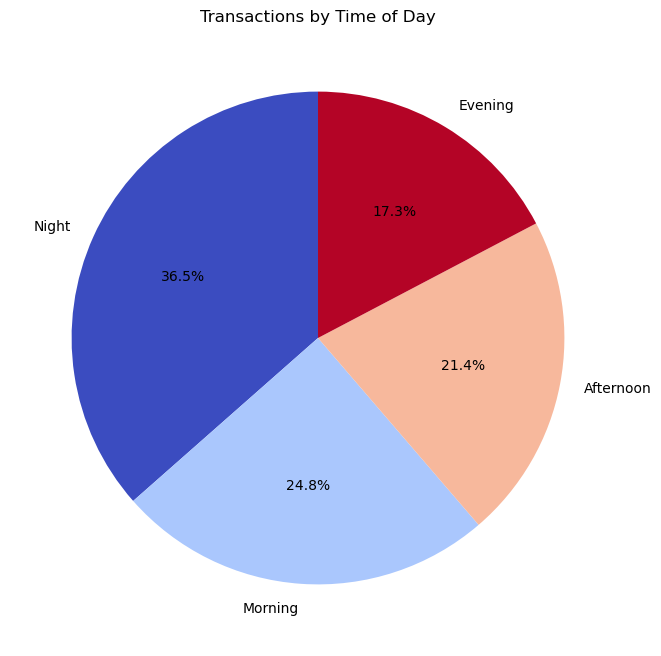

In [30]:
# Defining time categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Adding a 'TimeOfDay' column
merged_data['TimeOfDay'] = merged_data['Hour'].apply(categorize_time)

# Count transactions by time of day
time_of_day_transactions = merged_data['TimeOfDay'].value_counts()

# Pie chart visualization
plt.figure(figsize=(8, 8))
time_of_day_transactions.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', title='Transactions by Time of Day')
plt.ylabel('')  # Remove y-label
plt.show()



**Q14: On which day more number of customers are visting the stores?**

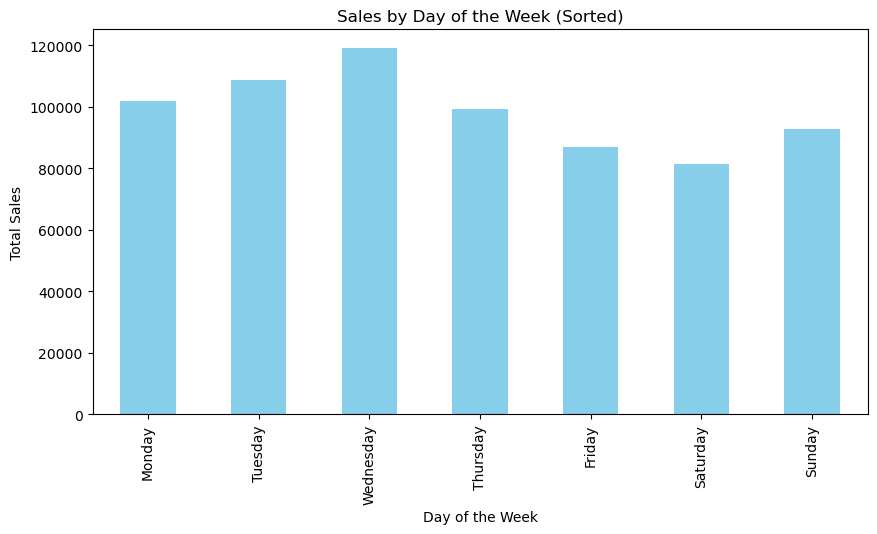

In [32]:
# Sorting days of the week in natural order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group sales by day of the week and sum total value
day_sales = merged_data.groupby('DayOfWeek')['TotalValue'].sum().reindex(day_order)

# Bar chart for sorted sales by day of the week
plt.figure(figsize=(10, 5))
day_sales.plot(kind='bar', color='skyblue', title='Sales by Day of the Week (Sorted)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


**Q15:what is the average revenue per transaction over time ?**

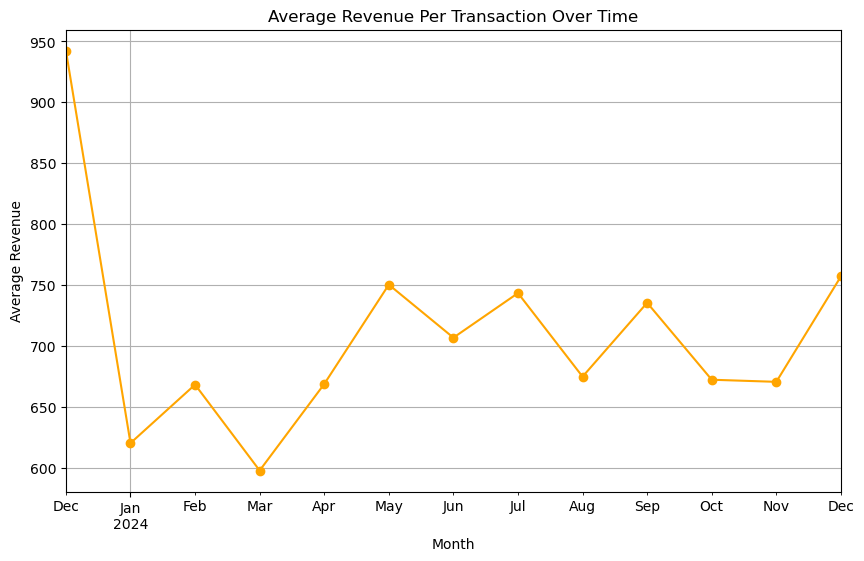

In [34]:

monthly_avg_revenue = merged_data.groupby('Month')['TotalValue'].mean()

# Line plot for average revenue trend
plt.figure(figsize=(10, 6))
monthly_avg_revenue.plot(kind='line', marker='o', color='orange', title='Average Revenue Per Transaction Over Time')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.grid()
plt.show()


**Q16: Which region contributing more to the revenue?**

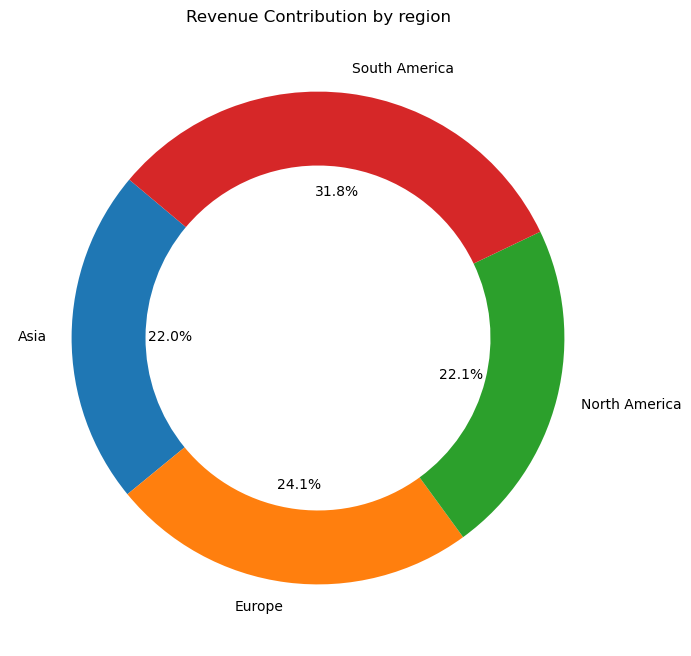

In [33]:

city_revenue = merged_data.groupby('Region')['TotalValue'].sum()

# Doughnut chart
plt.figure(figsize=(8, 8))
city_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), title='Revenue Contribution by region')
plt.ylabel('')
plt.show()


**Q17: What are percentage of the customers are getting repeated?**

Repeat Purchase Rate: 93.97%


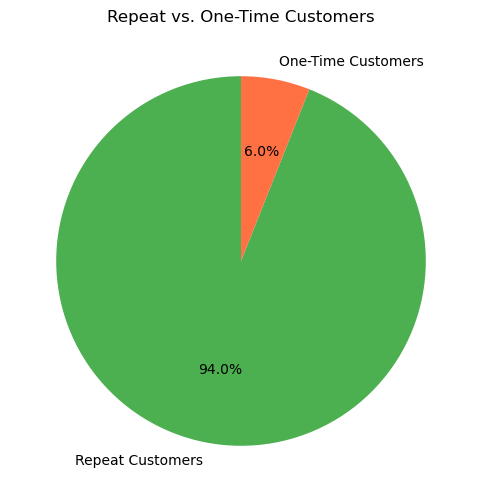

In [34]:
# Calculate repeat purchase rate
repeat_customers = merged_data['CustomerID'].value_counts()
repeat_rate = (repeat_customers > 1).mean() * 100
print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")

# Visualization
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [(repeat_customers > 1).sum(), (repeat_customers == 1).sum()]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF7043'])
plt.title('Repeat vs. One-Time Customers')
plt.show()


**Q18: What is the avarage revenue per customer by region?**

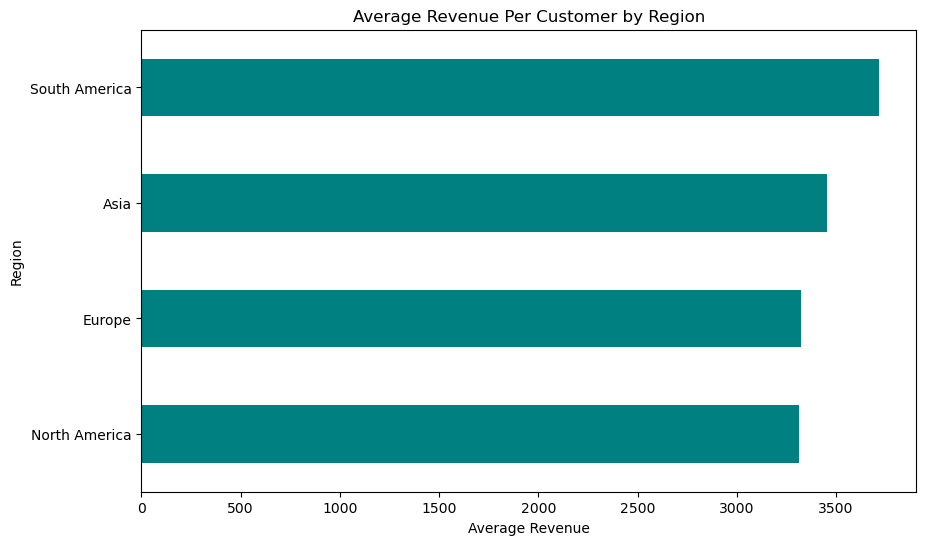

In [35]:
# Average revenue per customer by region
avg_revenue_region = merged_data.groupby('Region')['TotalValue'].sum() / merged_data.groupby('Region')['CustomerID'].nunique()

# Visualization
avg_revenue_region.sort_values().plot(kind='barh', figsize=(10, 6), color='teal', title='Average Revenue Per Customer by Region')
plt.xlabel('Average Revenue')
plt.ylabel('Region')
plt.show()


## Summary of the insights

### Customer Insights

**Count of Unique Customer Signups by Year:**
In 2022, 64 customers signed up, followed by 56 in 2023, and 79 in 2024. Customer signups have been increasing, with 2024 showing the highest growth.

**Customers with the Highest Lifetime Value (CLV):**
Customer C0141 contributes the highest CLV of $10,673.87, followed by C0054 with $8,040.39. These high-value customers should be prioritized for retention strategies.

**Customer Recency:**
The average recency (days since the last purchase) across customers is approximately 100 days, indicating many customers have not purchased recently and may need re-engagement campaigns.

**Customer Distribution by Region:**
Majority of customers are from South America followed by Europe and similar range of customers from both Asia and North America. So South America and Europe are the primary areas to focus.

**Frequent Customers:**
Frequent customers include C0109, C0156, C0141, C0175, and C0065, indicating high loyalty.

### Product Insights

**Best-Selling Products:**
Top-selling products include Activewear Smart Watches, Soundwave Headphones, and Home Sense Desk Lamp.

**Highest Revenue Products:**
Products generating the most revenue include Activewear Smart Watches, Soundwave Headphones, and Activewear Jacket.

**Revenue by Product Category:**
Books: 27.8%
Electronics: 26.2%
Clothing: 24.1%
Home Decor: 21.9%

**Average Product Prices by Category:**
Books: $292.21
Electronics: $275.35
Clothing: $263.72
Home Decor: $235.02

### Sales and Revenue Insights

**Monthly Revenue Trends:**
Revenue shows seasonal fluctuations, with peaks in December ($70k) and dips in early months ($40k–$50k).

**Revenue by Region:**
South America leads with $220,000, followed by Europe ($170,000), Asia ($150,000), and North America ($150,000).

**Time of Day Trends:**
Transactions are highest during:
Night: 36.5%
Morning: 24.8%
Afternoon: 21.4%
Evening: 17.3%

**Day of the Week Trends:**
The highest transaction days are:
Wednesday > Tuesday > Monday

**Average Revenue Per Transaction:**
Monthly averages range from $600 (March) to $940 (December).

**Repeat Customers:**
94% of customers are repeat buyers, while 6% are one-time buyers.

**Average Revenue Per Customer by Region:**
South America: $3,700
Asia: $3,500
Europe: $3,400
North America: $3,300
